# Código de la figura 2.3: Corriente externa constante con respecto al tiempo (arriba) y voltaje total del sistema (abajo)


# 0. Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Creación de funciones

La función "current_input(t)" representa un cambio en la corriente en dos puntos específicos del tiempo (t1 y t2), donde la corriente puede ser cero antes de t1, constante e igual a I_t1 entre t1 y t2, y luego cero nuevamente o igual a I_t2 después de t2.

In [2]:
def current_input(t):
    t1, t2 = 10, 40
    I_t1, I_t2 = 4, 0
    if t < t1:
        return 0
    elif t1 <= t < t2:
        return I_t1
    else:
        return I_t2

# 2. Variables de entorno

- t:  crear un espacio de tiempo de 0 a 60 con 200 puntos \
- I_values: array que almacena los valores de corriente en cada punto de tiempo \
- v(0) = 0: valor inicial del potencial \
- v_values: array vacio para almacenar los valores del potencial v



In [3]:
t = np.linspace(0, 60, 200)
I_values = np.vectorize(current_input)(t)
v0 = 0
v_values = np.zeros_like(t)

# 3. Cálculos

Método de Euler explicito para el cálculo del voltaje V

In [5]:
for i in range(1, len(t)):
    dt = t[i] - t[i-1]
    v_values[i] = v_values[i-1] + (-v_values[i-1] + I_values[i-1]) * dt

# 4. Dibujo de la gráfica

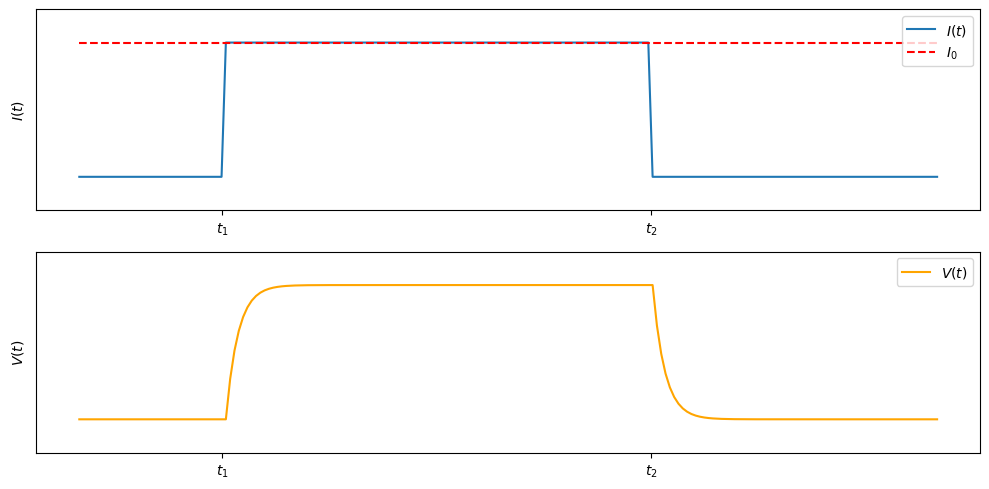

In [6]:
plt.figure(figsize=(10, 5))
#Dibujo de arriba, corriente externa con respecto al tiempo
plt.subplot(2, 1, 1)
plt.plot(t, I_values, label='$I(t)$')
plt.ylim(-1, 5)
plt.xlabel('')
plt.ylabel('$I(t)$')
plt.xticks([])  
plt.xticks([10, 40], ['$t_1$', '$t_2$'])  
plt.yticks([])
plt.legend()
plt.hlines(y=4, xmin=0, xmax=60, color='red', linestyle='--', label='$I_0$')
plt.legend()

#Dibujo de abajo, Voltaje total de la neurona
plt.subplot(2, 1, 2)
plt.plot(t, v_values, label='$V(t)$', color='orange')
plt.ylim(-1, 5)
plt.xlabel('')
plt.ylabel('$V(t)$')
plt.xticks([10, 40], ['$t_1$', '$t_2$'])
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()